In [1]:
cd ..

C:\Users\agus\Dropbox\Doctorado\NeuroData


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import PyLeech.Utils.AbfExtension as abfe
np.set_printoptions(precision=3)
plt.ion()
plt.rcParams['figure.figsize'] = (24,12)

In [3]:
filenames = ['18-12-13/2018_12_13_0015.abf']
arr_dict, time, fs = abfe.getArraysFromAbfFiles(filenames, ['Vm1'])
NS = arr_dict['Vm1']

In [4]:
import PyLeech.Utils.SpSorter as SpSorter
sorter = SpSorter.SpSorter('RegistrosDP_PP/2018_12_13_0015.pkl')

Loading data from pickle
Loaded:
filename
time
traces
sample_freq
state
peaks_idxs
evts
evt_interval
ch_no
evt_length
evts_median
evts_mad
evts_max
good_evts
unitary
original_clusters
km
train_clusters
cluster_color
template_dict
rounds
final_spike_dict


In [5]:
fn = sorter.filename
fn += 'spikes'
fn = fn.replace("/", "\\")

In [6]:
import PyLeech.Utils.burstClasses as burstClasses
import PyLeech.Utils.burstUtils as burstUtils
import PyLeech.Utils.CrawlingDatabaseUtils as CDU
%matplotlib qt5
%matplotlib qt5
plt.rcParams['figure.figsize'] = (24,12)

cdb = CDU.loadCrawlingDatabase()
good_neurons = cdb.loc[fn].index[cdb.loc[fn, 'neuron_is_good'].values.astype(bool)].values
crawling_interval = [cdb.loc[fn].start_time.iloc[0], cdb.loc[fn].end_time.iloc[0]]
burst_obj = burstClasses.UnitInfo(fn, 'RegistrosDP_PP', mode='load')

In [7]:
import PyLeech.Utils.burstUtils as burstUtils

# binned_sfd = binned_sfd = burstUtils.digitizeSpikeFreqs(burst_obj.spike_freq_dict, time[-1], 5 / fs, count=True)
# fig = burstUtils.plotFreq(binned_sfd, color_dict=burst_obj.color_dict, optional_trace=[time[::5], NS[::5]], template_dict=burst_obj.template_dict, scatter_plot=True,
#              outlier_thres=5, ms=2, draw_list=good_neurons)
#del sorter

In [8]:
plt.rcParams['figure.figsize'] = (24,12)
correlation_segments = burstClasses.SegmentandCorrelate(burst_obj.spike_freq_dict, NS, time,
                                                          time_intervals=burst_obj.crawling_segments,
                                                          intracel_cutoff_freq=2,
                                                          no_cycles=1, intracel_peak_height=-52)
# correlation_segments.concatenateRasterPlot()

Segments have already been binned and smoothed


In [21]:
reload(burstUtils)
binned_sfd = burstUtils.digitizeSpikeFreqs(burst_obj.spike_freq_dict, time[-1], 0.1, count=False)

In [23]:

fig = burstUtils.plotFreq(binned_sfd, color_dict=burst_obj.color_dict, optional_trace=[time[::5], NS[::5]], template_dict=burst_obj.template_dict, scatter_plot=True,
             outlier_thres=None, ms=4, draw_list=good_neurons)

In [24]:
spike_array = np.array([items[1] for key, items in binned_sfd.items()])

In [31]:
import csv

fn = '../dimension_testing.csv'
f = open(fn, 'w')
w = csv.writer(f)
w.writerows(spike_array.transpose())

f.close()

In [17]:
del burst_obj
del sorter

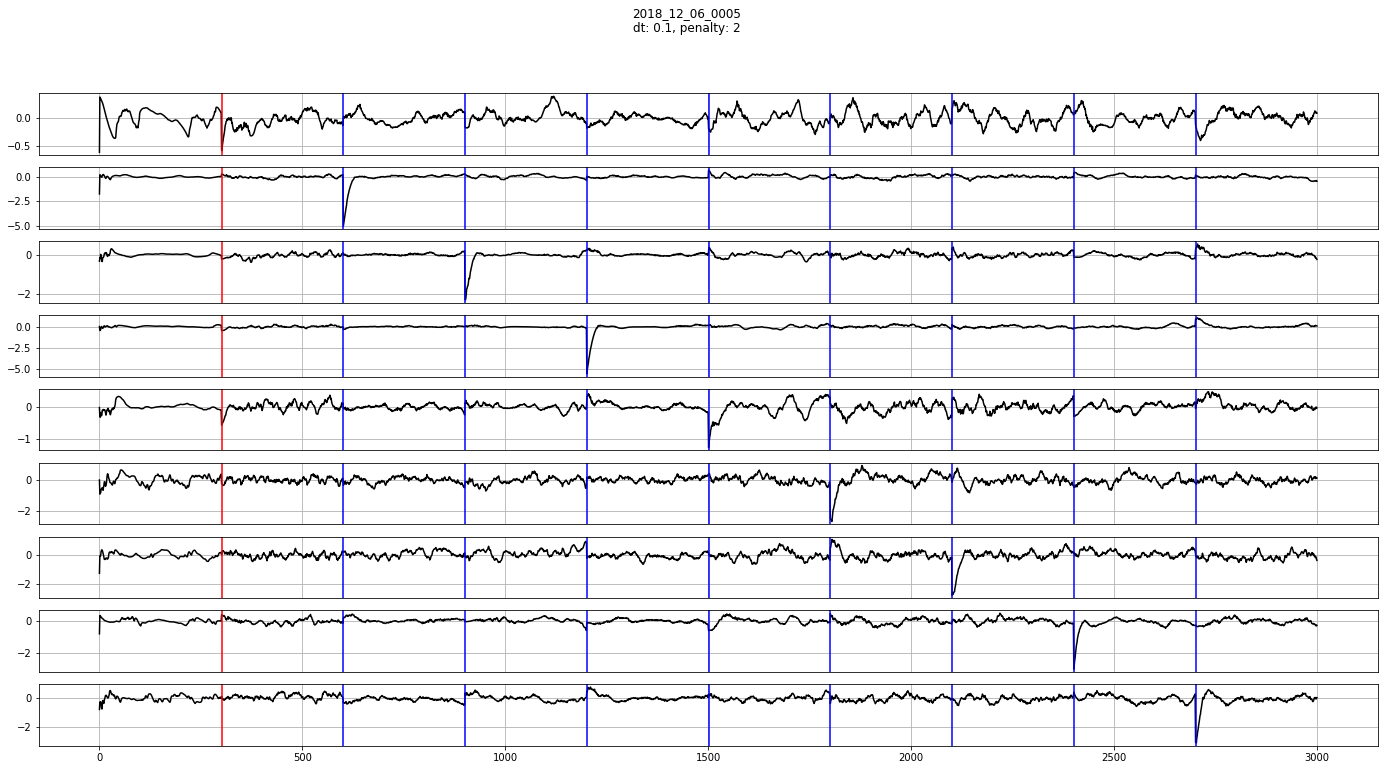

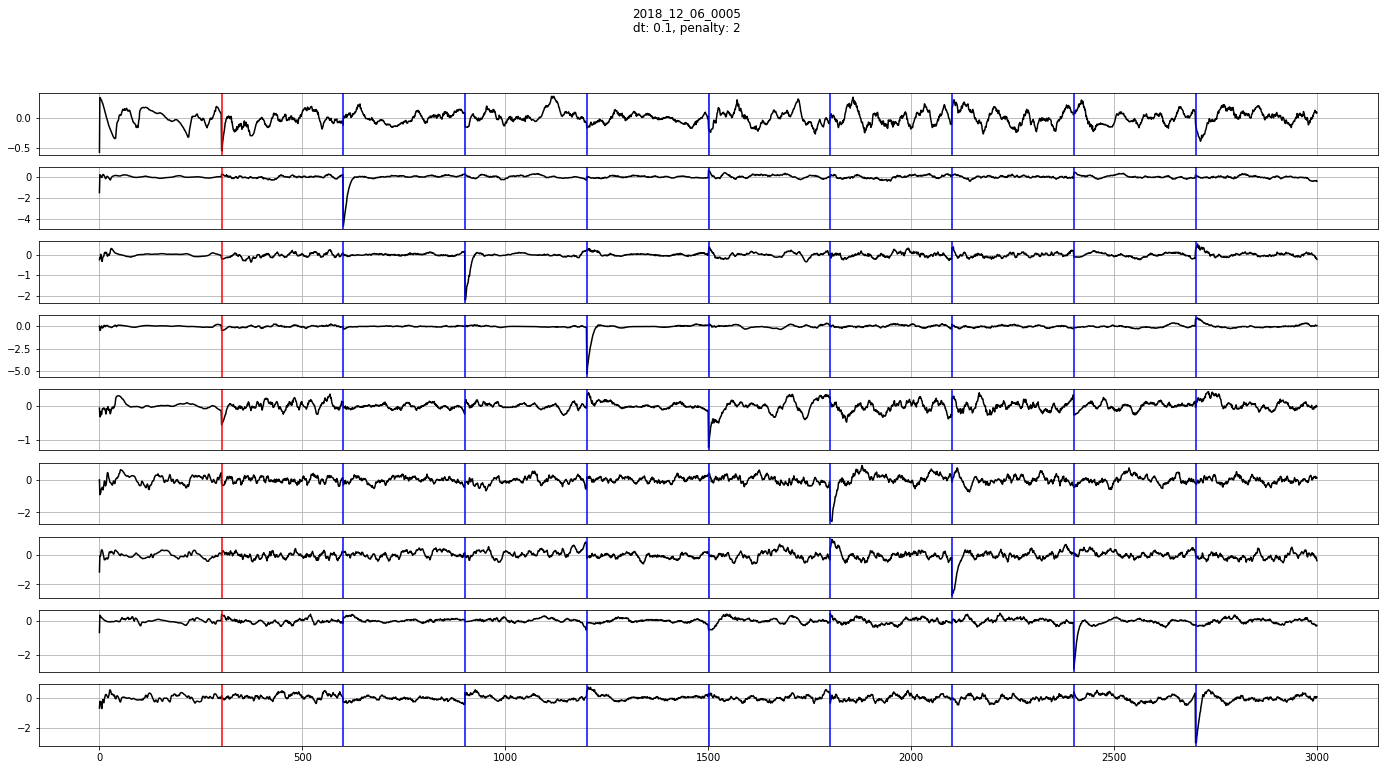

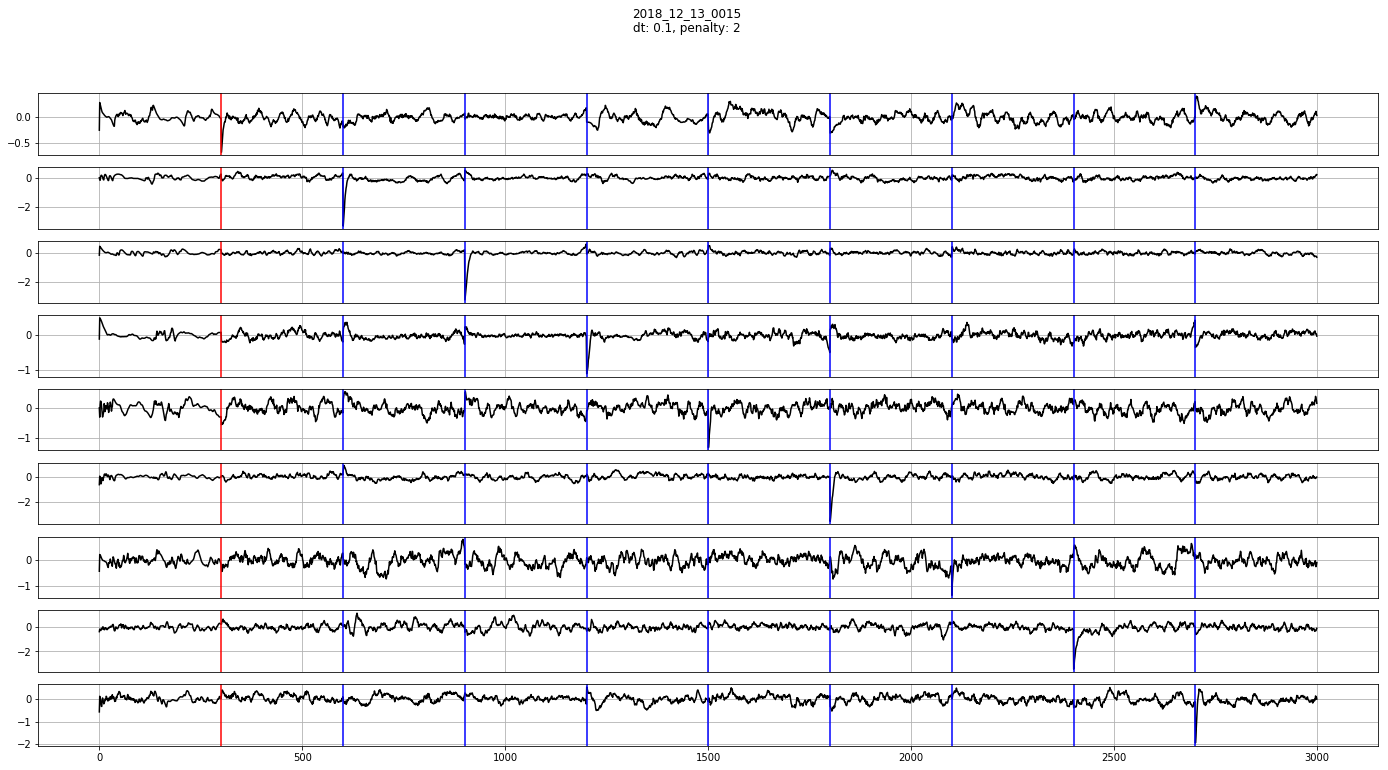

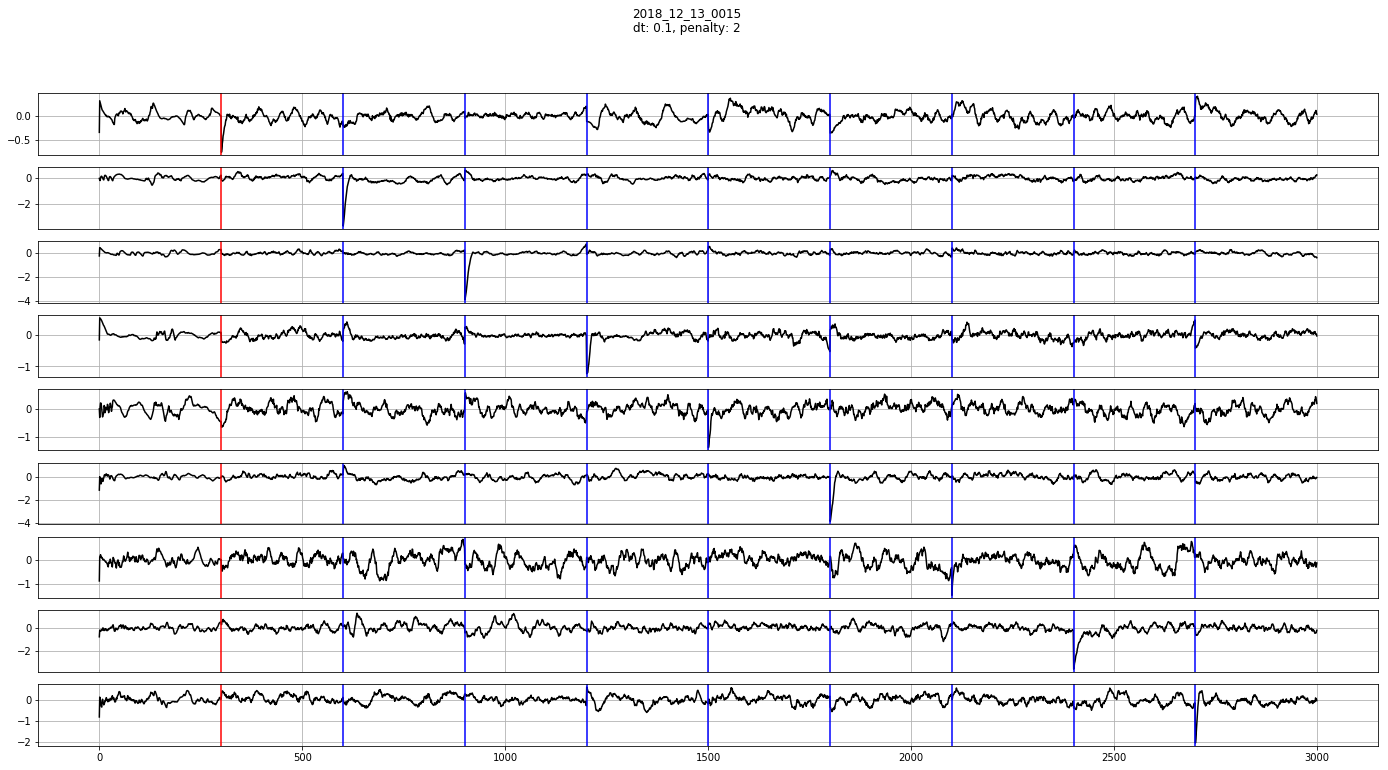

In [18]:
import pickle
with open('fitter_list.pickle', 'rb') as handle:
   fit_list = pickle.load(handle)

for fitter in fit_list:
    if fitter.dt == 0.1 and fitter.penalty_param == 2:
        fitter.plotFitArray()